In [2]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [80]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
b= sns
sns.set_theme(style="whitegrid") 
color=sns.color_palette("husl", 6)



In [82]:
df = pd.read_csv('/content/drive/MyDrive/Data science/My projects/Data visualization on Pakistan cities/worldcities.csv')

In [83]:
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [84]:
df.shape

(26569, 11)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26569 entries, 0 to 26568
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        26569 non-null  object 
 1   city_ascii  26569 non-null  object 
 2   lat         26569 non-null  float64
 3   lng         26569 non-null  float64
 4   country     26569 non-null  object 
 5   iso2        26538 non-null  object 
 6   iso3        26569 non-null  object 
 7   admin_name  26493 non-null  object 
 8   capital     7626 non-null   object 
 9   population  25596 non-null  float64
 10  id          26569 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ MB


# Data wrangling for Pakistan cities dataset

In [86]:
df_pak = df[df['country']=='Pakistan']

In [87]:
df_pak.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
22,Karachi,Karachi,24.8600,67.0100,Pakistan,PK,PAK,Sindh,admin,14835000.0,1586129469
32,Lahore,Lahore,31.5497,74.3436,Pakistan,PK,PAK,Punjab,admin,11021000.0,1586801463
199,Sialkot City,Sialkot City,32.5000,74.5333,Pakistan,PK,PAK,Punjab,minor,3893672.0,1586141444
243,Faisalabad,Faisalabad,31.4180,73.0790,Pakistan,PK,PAK,Punjab,minor,3203846.0,1586323916
374,Rawalpindi,Rawalpindi,33.6007,73.0679,Pakistan,PK,PAK,Punjab,minor,2098231.0,1586344001


In [88]:
df_pak = df_pak.reset_index(drop=True)

In [89]:
df_pak.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Karachi,Karachi,24.8600,67.0100,Pakistan,PK,PAK,Sindh,admin,14835000.0,1586129469
1,Lahore,Lahore,31.5497,74.3436,Pakistan,PK,PAK,Punjab,admin,11021000.0,1586801463
2,Sialkot City,Sialkot City,32.5000,74.5333,Pakistan,PK,PAK,Punjab,minor,3893672.0,1586141444
3,Faisalabad,Faisalabad,31.4180,73.0790,Pakistan,PK,PAK,Punjab,minor,3203846.0,1586323916
4,Rawalpindi,Rawalpindi,33.6007,73.0679,Pakistan,PK,PAK,Punjab,minor,2098231.0,1586344001


In [90]:
df_pak.shape

(90, 11)

In [91]:
df_pak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        90 non-null     object 
 1   city_ascii  90 non-null     object 
 2   lat         90 non-null     float64
 3   lng         90 non-null     float64
 4   country     90 non-null     object 
 5   iso2        90 non-null     object 
 6   iso3        90 non-null     object 
 7   admin_name  90 non-null     object 
 8   capital     56 non-null     object 
 9   population  90 non-null     float64
 10  id          90 non-null     int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 7.9+ KB


In [92]:
df_pak=df_pak.rename(columns = {'admin_name':'province'})

In [93]:
#Total Number of missing values
df_pak.isnull().sum().sort_values(ascending=False)


capital       34
id             0
population     0
province       0
iso3           0
iso2           0
country        0
lng            0
lat            0
city_ascii     0
city           0
dtype: int64

In [94]:
# check out the rows with missing values
df_pak[df_pak.isnull().any(axis=1)].head()



,city,city_ascii,lat,lng,country,iso2,iso3,province,capital,population,id
19,Rahimyar Khan,Rahimyar Khan,28.4202,70.2952,Pakistan,PK,PAK,Punjab,NaN,353203.0,1586136399
23,Mingaora,Mingaora,34.7717,72.3600,Pakistan,PK,PAK,Khyber Pakhtunkhwa,NaN,279914.0,1586782526
29,Mandi Burewala,Mandi Burewala,30.1500,72.6833,Pakistan,PK,PAK,Punjab,NaN,203454.0,1586997587
31,Saddiqabad,Saddiqabad,28.3006,70.1302,Pakistan,PK,PAK,Punjab,NaN,189876.0,1586378758
33,Muridke,Muridke,31.8020,74.2550,Pakistan,PK,PAK,Punjab,NaN,163268.0,1586205456


In [95]:
#remove negative values with rows
df_pak=df_pak.dropna()

In [96]:
#Total Number of missing values
df_pak.isnull().sum().sort_values(ascending=False)


id            0
population    0
capital       0
province      0
iso3          0
iso2          0
country       0
lng           0
lat           0
city_ascii    0
city          0
dtype: int64

In [97]:
df_pak = df_pak.fillna(0)
df_pak['population'] = df['population'].astype(float)

In [98]:
df_pak.describe()

,lat,lng,population,id
count,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,31.227984,71.454609,1.367822e+07,1.586496e+09
std,2.951575,2.376533,7.152824e+06,3.183299e+05
min,24.860000,62.322500,6.537498e+06,1.586001e+09
25%,30.065225,70.550025,7.757750e+06,1.586277e+09
50%,31.712500,71.814850,1.117250e+07,1.586492e+09
75%,33.542800,73.129800,1.723375e+07,1.586812e+09
max,35.920800,74.533300,3.797700e+07,1.586969e+09


In [99]:

df_pak.isin([31.86]).sum()

city          0
city_ascii    0
lat           0
lng           0
country       0
iso2          0
iso3          0
province      0
capital       0
population    0
id            0
dtype: int64

In [100]:
(df_pak['lat'] == 24.86).sum()

1

In [101]:
df_pak['id'].unique()

array([1586129469, 1586801463, 1586141444, 1586323916, 1586344001,
       1586851102, 1586619596, 1586256291, 1586400472, 1586306717,
       1586556108, 1586038700, 1586696588, 1586007078, 1586413435,
       1586383591, 1586678302, 1586291726, 1586288677, 1586006990,
       1586858135, 1586001546, 1586002238, 1586294005, 1586672083,
       1586156251, 1586880900, 1586964444, 1586349992, 1586492401,
       1586202018, 1586788758, 1586791198, 1586409848, 1586001015,
       1586888846, 1586290729, 1586628764, 1586008360, 1586928614,
       1586006907, 1586655125, 1586969046, 1586889028, 1586875835,
       1586902336, 1586858934, 1586843763, 1586857142, 1586200762,
       1586769539, 1586491871, 1586494172, 1586861716, 1586677063,
       1586284242])

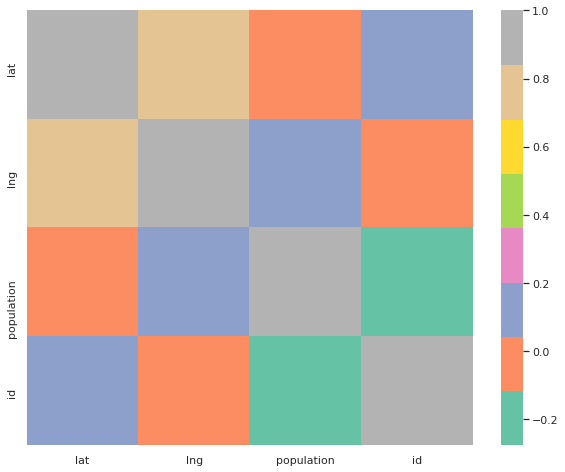

In [102]:
sns.heatmap(df_pak.corr(),cmap="Set2")
#you can find futher color map for heatmap, cmap="YlGnBu" on seaborn website


In [103]:
df_pak.head()


,city,city_ascii,lat,lng,country,iso2,iso3,province,capital,population,id
0,Karachi,Karachi,24.8600,67.0100,Pakistan,PK,PAK,Sindh,admin,37977000.0,1586129469
1,Lahore,Lahore,31.5497,74.3436,Pakistan,PK,PAK,Punjab,admin,34540000.0,1586801463
2,Sialkot City,Sialkot City,32.5000,74.5333,Pakistan,PK,PAK,Punjab,minor,29617000.0,1586141444
3,Faisalabad,Faisalabad,31.4180,73.0790,Pakistan,PK,PAK,Punjab,minor,23355000.0,1586323916
4,Rawalpindi,Rawalpindi,33.6007,73.0679,Pakistan,PK,PAK,Punjab,minor,23088000.0,1586344001


10.0
8.0


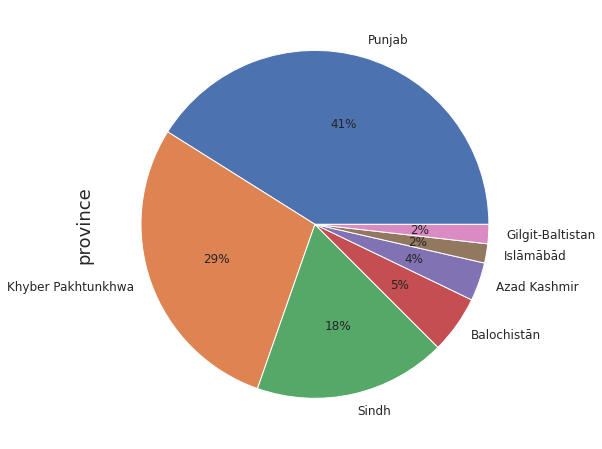

In [104]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 18})
plt.xlabel('',fontsize=18)
plt.ylabel('',fontsize=18)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df_pak.province.value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 12})

# As you see in above provinces pie chart where you can see islamabad as province, its an outlier. Let's fix this outlier

In [105]:
print(df_pak.loc[df_pak['province']=='Islāmābād'])#Islāmābād


        city city_ascii      lat  ...  capital  population          id
9  Islamabad  Islamabad  33.6989  ...  primary  20902000.0  1586306717

[1 rows x 11 columns]


# As you see in above table islamabad outlier has an different character **'ā' ** let's check first how many data in province has same character.

In [106]:
df_pak_outlier=df_pak[df_pak['province'].str.contains("ā")]
df_pak_outlier.head()

,city,city_ascii,lat,lng,country,iso2,iso3,province,capital,population,id
9,Islamabad,Islamabad,33.6989,73.0369,Pakistan,PK,PAK,Islāmābād,primary,20902000.0,1586306717
10,Quetta,Quetta,30.1920,67.0070,Pakistan,PK,PAK,Balochistān,admin,19433000.0,1586556108
58,Zhob,Zhob,31.3417,69.4486,Pakistan,PK,PAK,Balochistān,minor,7739000.0,1586969046
75,Gwadar,Gwadar,25.1264,62.3225,Pakistan,PK,PAK,Balochistān,minor,7100000.0,1586857142


# Now we have indentified two outliers, let's fix these outlier accordingly.

In [107]:
#replacing islamabad value to punjab province
# df_pak.loc[df_pak['province']=='Islāmābād']='Punjab'

#correction of single character by detecting in column and then reassign correct spelling of a word
#df_pak.loc[df_pak['province']=='Balochistān']= 
indx =df_pak.loc[df_pak['province']=='Islāmābād'].index.values
df_pak.at[indx[0],'province'] = 'Punjab'
indx=df_pak[df_pak['province'].str.contains("ā")].index.values
for x in indx:#df.at[index, 'col_name'] = x

  df_pak.at[x, 'province'] = 'Balochistan'
#,['province']] = df_pak['city']
# df.sport.apply(lambda x: 'ball sport' if 'ball' in x else x
# df_pak.province.apply(lambda x: "ā" if x = df_pak['country'] )
#df_pak.loc[df_pak['province']=='Punjab', df_pak1['city']] = 'toddler'

In [108]:
df_pak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 89
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        56 non-null     object 
 1   city_ascii  56 non-null     object 
 2   lat         56 non-null     float64
 3   lng         56 non-null     float64
 4   country     56 non-null     object 
 5   iso2        56 non-null     object 
 6   iso3        56 non-null     object 
 7   province    56 non-null     object 
 8   capital     56 non-null     object 
 9   population  56 non-null     float64
 10  id          56 non-null     int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 7.8+ KB


In [109]:
df_pak_outlier=df_pak[df_pak['province'].str.contains("ā")]
df_pak_outlier.head()

,city,city_ascii,lat,lng,country,iso2,iso3,province,capital,population,id


As you have seen now there is no such values which we called outliers.

### Total number of population by the given cities of Pakistan

In [110]:
df_pak['population'].sum()

765980552.0

## We have found that population of pakistan is too large you can bad values, another type of outlier.

In [111]:
#found another dataset from wolrd meter
pak_cities_pop= pd.read_csv('/content/drive/MyDrive/Data science/My projects/Data visualization on Pakistan cities/csvData.csv')

In [112]:
pak_cities_pop.shape

(386, 2)

In [113]:
pak_cities_pop.head()

,2021,name
0,11624219,Karachi
1,6310888,Lahore
2,2506595,Faisalabad
3,1743101,Rawalpindi
4,1437230,Multan


In [114]:
pak_cities_pop.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2021    386 non-null    int64 
 1   name    386 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [116]:
indx = df_pak['city'].isin(pak_cities_pop['name']).index.values

In [117]:
pak_cities_pop['2021'].sum()

53253892

In [41]:
pak_cities_pop.iloc[39]

2021     164246
name    Muridke
Name: 39, dtype: object

In [118]:
for x in indx:
  df_pak.at[x, 'population'] = pak_cities_pop.at[x,'2021']

In [119]:
df_pak['population'].max()

11624219.0

In [120]:
df_pak.describe()

,lat,lng,population,id
count,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,31.227984,71.454609,7.159569e+05,1.586496e+09
std,2.951575,2.376533,1.748895e+06,3.183299e+05
min,24.860000,62.322500,7.464000e+04,1.586001e+09
25%,30.065225,70.550025,1.199462e+05,1.586277e+09
50%,31.712500,71.814850,2.127145e+05,1.586492e+09
75%,33.542800,73.129800,5.648552e+05,1.586812e+09
max,35.920800,74.533300,1.162422e+07,1.586969e+09


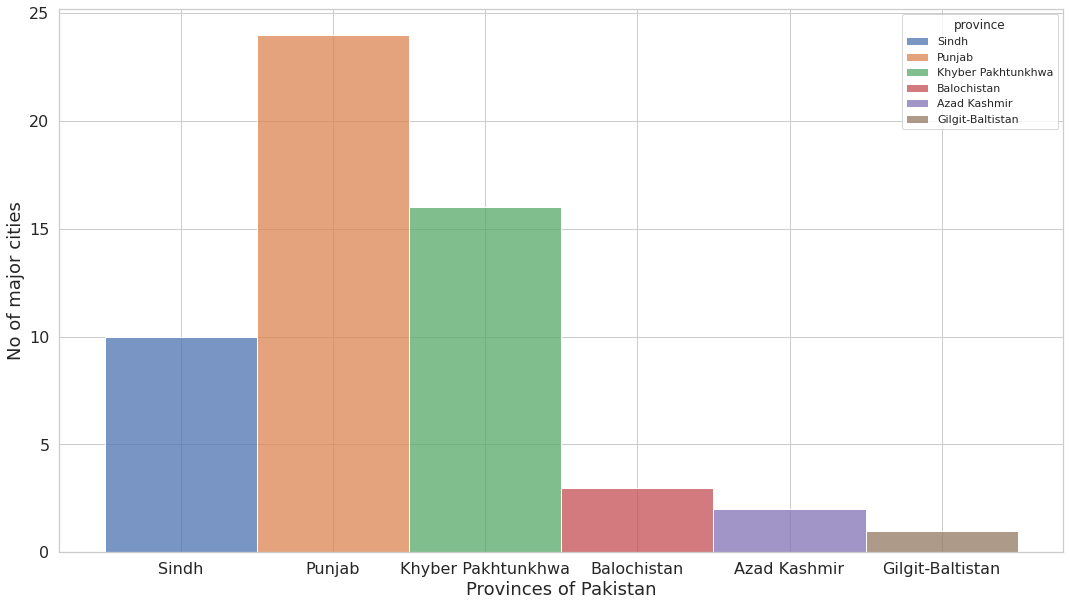

In [121]:


fig, ax = plt.subplots(figsize=(18,10))
b = sns.histplot(x='province',data=df_pak,ax=ax,hue="province",multiple='stack')
b.axes.set_title("",fontsize=24)
b.set_xlabel("Provinces of Pakistan",fontsize=18)
b.set_ylabel("No of major cities",fontsize=18)
b.tick_params(labelsize=16)



Text(0.5, 0, 'Years of Experience')

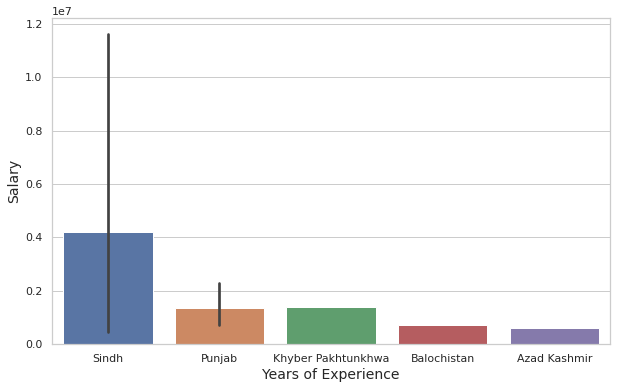

In [122]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
b =sns.barplot(x='province',y='population',data=df_pak[:20])

b.set_ylabel("Salary",fontsize=14)
b.set_xlabel("Years of Experience",fontsize=14)



Text(0.5, 0, 'Cities ')

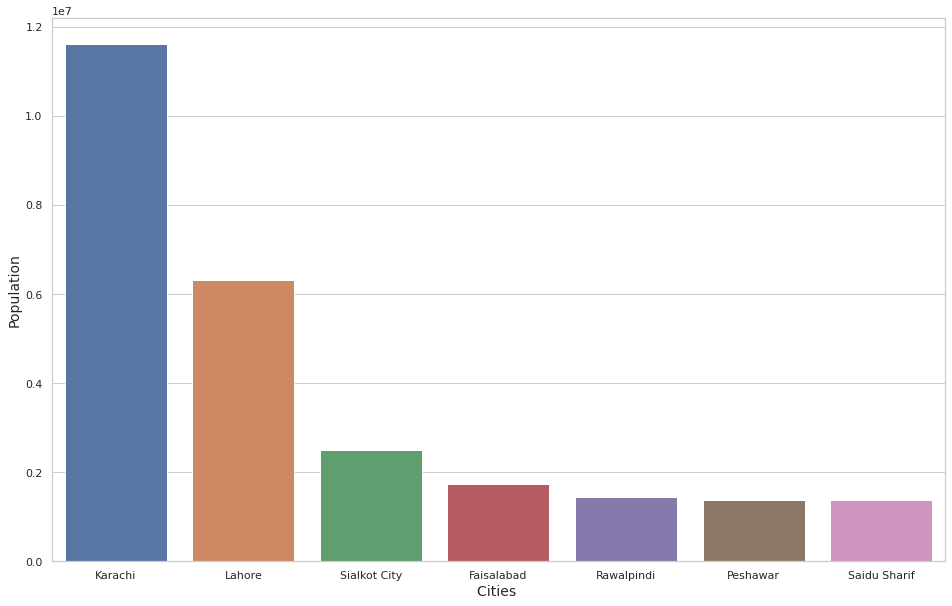

In [124]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
b =sns.barplot(x='city',y='population',data=df_pak[:7])

b.set_ylabel("Population",fontsize=14)
b.set_xlabel("Cities ",fontsize=14)



Text(0.5, 0, 'Cities')

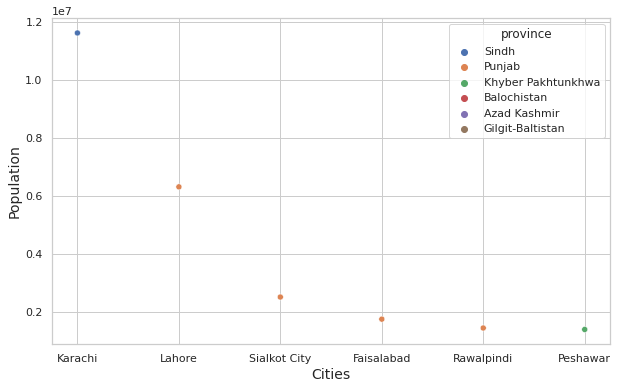

In [129]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
b =sns.scatterplot(x=df_pak.city[:6], y=df_pak.population[:6],data=df_pak,hue='province')
b.set_ylabel("Population",fontsize=14)
b.set_xlabel("Cities",fontsize=14)


In [132]:
df_pak.to_csv('/content/drive/MyDrive/Data science/My projects/Data visualization on Pakistan cities/Pakistan_major_cities.csv', index=False)